In [50]:
# import common lib
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler, Normalizer

# import classifier
from sklearn.naive_bayes import GaussianNB
from sklearn import neighbors
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from xgboost import XGBClassifier

from models import *

In [51]:
# active seaborn theme for matplotlib
sns.set_theme()

In [52]:
# 
# %run -i "install.ipynb" capture_output=False
# %run -i "preprocessing.ipynb" capture_output=False

In [53]:
data = pd.read_csv('./open-meteo.clean.csv')

In [54]:
data_len = len(data[data.columns[0]])
feature_len = data.columns.size - 1

print(data_len)
print(feature_len)

9373
51


3. Train

In [55]:
target = data['weather_code']
X = data.drop("weather_code", axis=1)
feature_names = data.columns.array
feature_names = feature_names[1:]

#target.drop(index=0,axis=0)
#X.drop(index=(len(X)-1), axis=0)

le = LabelEncoder()
y = le.fit_transform(target)

y_index = np.array(list(set(y)))
y_label = le.inverse_transform(y_index)
y_label = [str(item).zfill(2) for item in y_label]

print(y_index)
print(y_label)

[0 1 2 3 4 5 6 7 8 9]
['00', '01', '02', '03', '51', '53', '55', '61', '63', '65']


In [56]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

mm_scaler = MinMaxScaler()
st_scaler = StandardScaler()
norml = Normalizer()

# scaler fit và transform trên tập train
X_train_mm = mm_scaler.fit_transform(X_train)
X_train_st = st_scaler.fit_transform(X_train)
X_train_nm = norml.fit_transform(X_train)

# scaler chỉ transform trên tập test, không được fit
X_test_mm = mm_scaler.transform(X_test)
X_test_st = st_scaler.transform(X_test)
X_test_nm = norml.transform(X_test)


<BarContainer object of 50 artists>

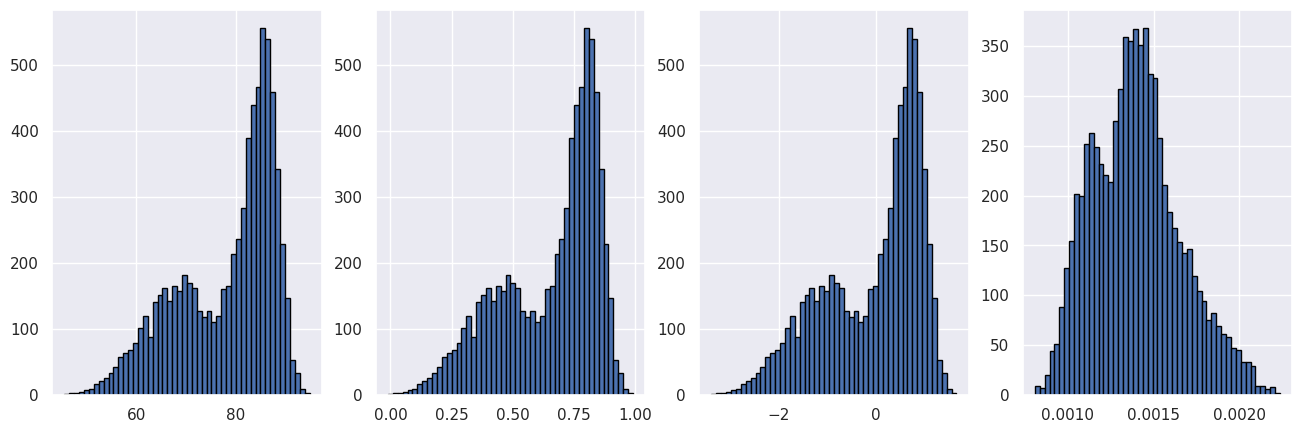

In [57]:
# Xem thử dữ liệu được scaling
fig, axs = plt.subplots(1, 4, figsize=(16, 5))

indices = np.where(feature_names == 'relative_humidity_2m_mean')
idx = indices[0]

counts1, bin_edges1 = np.histogram(X_train['relative_humidity_2m_mean'], bins=50, density=False)
counts2, bin_edges2 = np.histogram(X_train_mm[:,idx], bins=50, density=False)
counts3, bin_edges3 = np.histogram(X_train_st[:,idx], bins=50, density=False)
counts4, bin_edges4 = np.histogram(X_train_nm[:,idx], bins=50, density=False)


axs[0].bar(bin_edges1[:-1], counts1, width=bin_edges1[1]-bin_edges1[0], edgecolor='black')
axs[1].bar(bin_edges2[:-1], counts2, width=bin_edges2[1]-bin_edges2[0], edgecolor='black')
axs[2].bar(bin_edges3[:-1], counts3, width=bin_edges3[1]-bin_edges3[0], edgecolor='black')
axs[3].bar(bin_edges4[:-1], counts4, width=bin_edges4[1]-bin_edges4[0], edgecolor='black')

Nhận xét:
- Normalization làm mất hình dạng dữ liệu ban đầu
- Min-Max Scaling và Standardization đưa dữ liệu sang 1 miền giá trị khác nhưng không làm mất hình dạng dữ liệu

4. Evaluate

In [58]:
from models import *

In [59]:
def display_confusion_matrix(Clf, varian_group_name, y_label, save_name=None):
    varian_size = len(Clf)
    fig, axs = plt.subplots(1, varian_size, figsize=(18, 5))

    for i in range(varian_size):
        Clf[i].confusion_matrix(axs[i], y_label)
        axs[i].set_title(varian_group_name[i])
        axs[i].set_xlabel('Predicted Label')
        axs[i].set_ylabel('True Label')

    # Adjust layout to prevent overlapping titles/labels
    plt.tight_layout()

    if save_name is not None:
        plt.savefig(f'{save_name}_confusion_matrix.png')

    # Display the figure with subplots
    plt.show()

In [60]:
final_score = []
data_varian_size = 4

X_train_varian_group = [X_train, X_train_mm, X_train_st, X_train_nm]
X_test_varian_group = [X_test, X_test_mm, X_test_st, X_test_nm]
varian_group_name = ["Original", "Min-Max Scaling", "Standardization", "Normalization"]

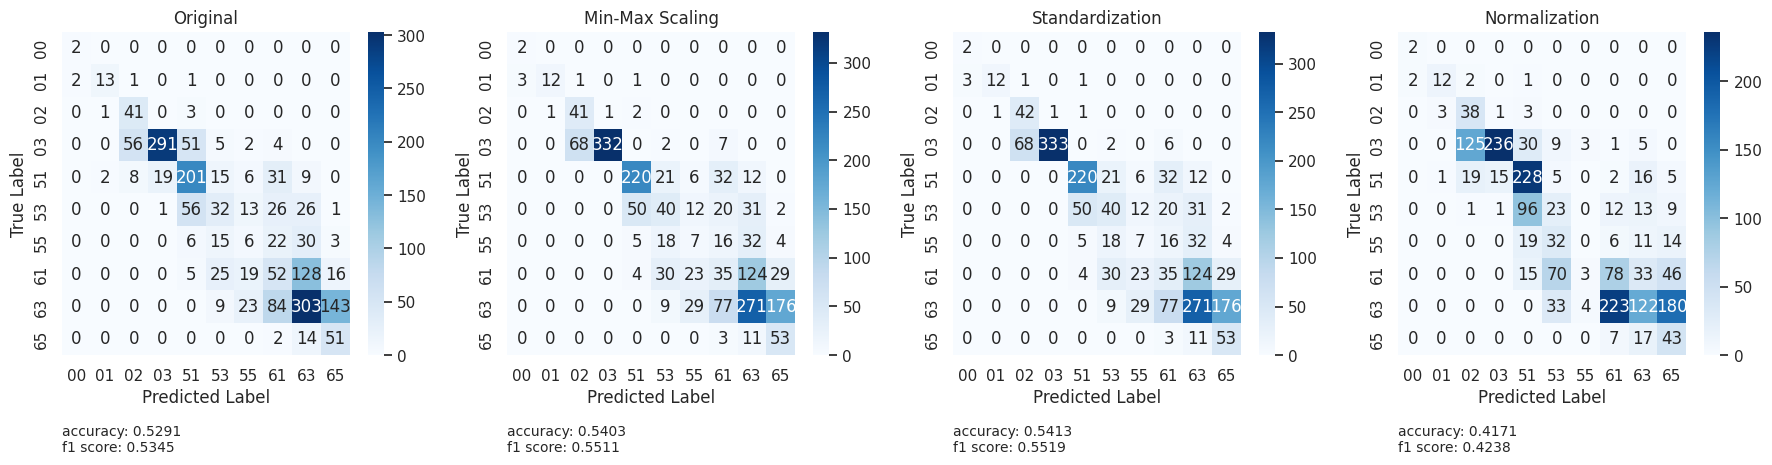

In [61]:
nb_score = []
nb = []

for i in range(data_varian_size):
    nb.append(My_NaiveBayes(X_train_varian_group[i], X_test_varian_group[i], y_train, y_test))
    nb_score.append(nb[i].forward())

final_score.append(nb_score)
display_confusion_matrix(nb, varian_group_name, y_label)

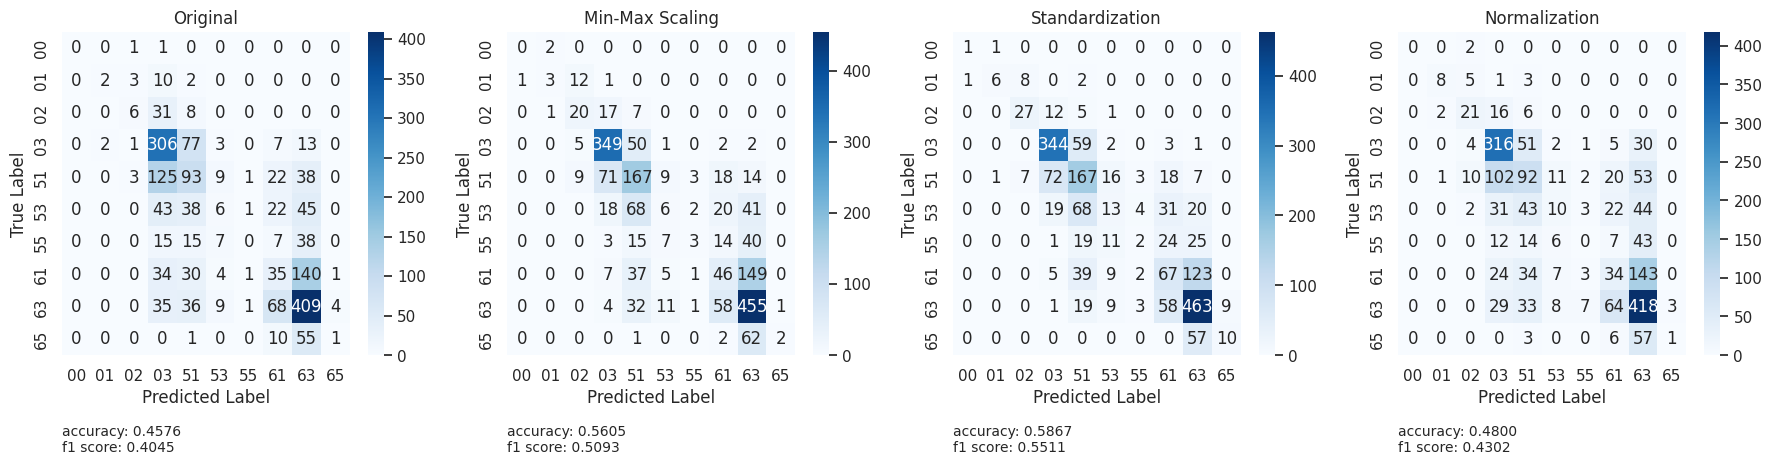

In [62]:
knn_score = []
knn = []

for i in range(data_varian_size):
    knn.append(My_KNN(X_train_varian_group[i], X_test_varian_group[i], y_train, y_test))
    knn_score.append(knn[i].forward())

final_score.append(knn_score)
display_confusion_matrix(knn, varian_group_name, y_label)

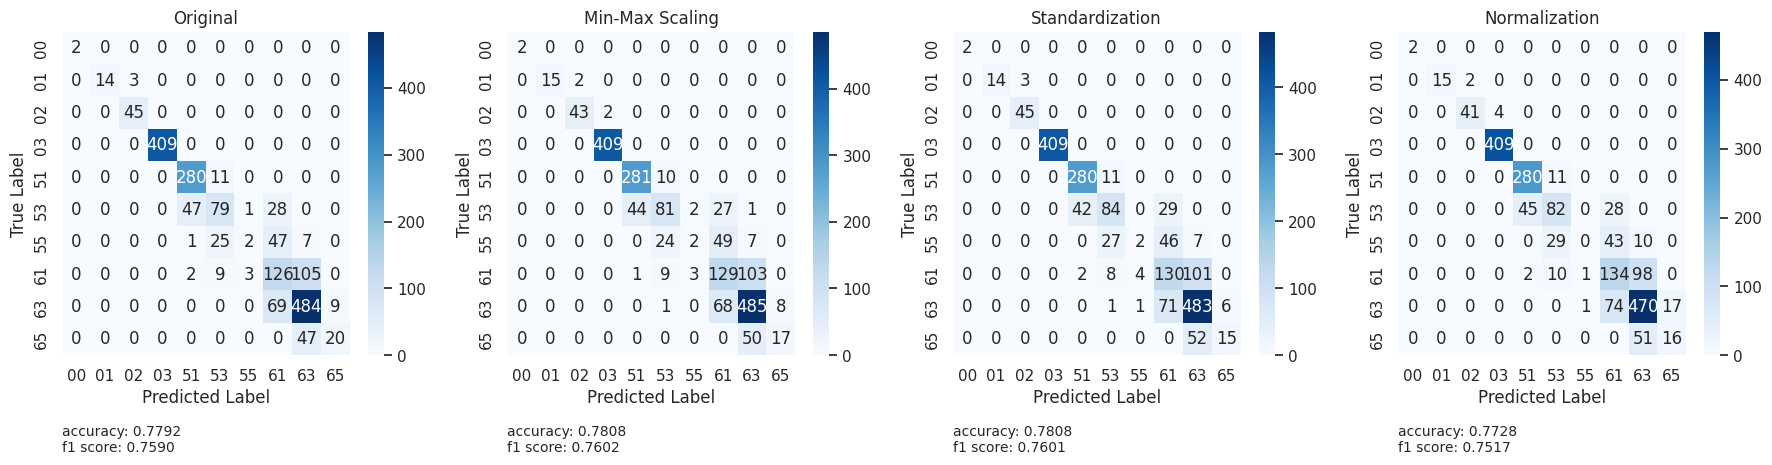

In [63]:
rf_score = []
rf = []

for i in range(data_varian_size):
    rf.append(My_RDF(X_train_varian_group[i], X_test_varian_group[i], y_train, y_test))
    rf_score.append(rf[i].forward())

final_score.append(rf_score)
display_confusion_matrix(rf, varian_group_name, y_label, "RF")

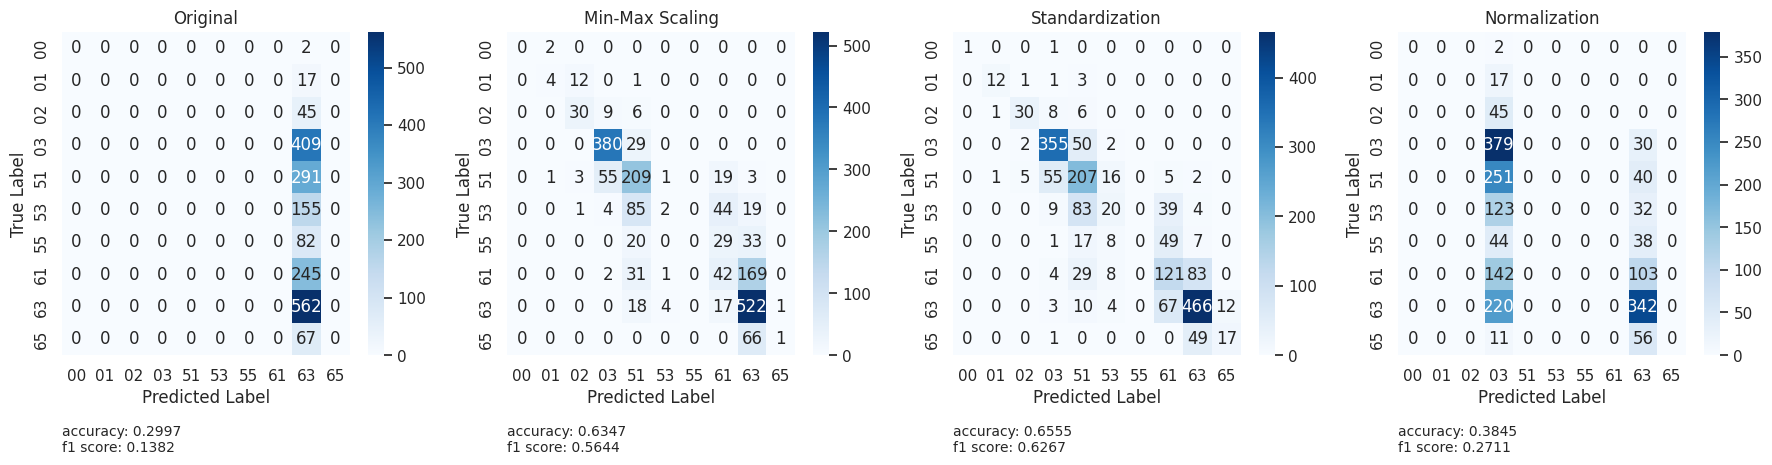

In [64]:
svm_score = []
svm = []

for i in range(data_varian_size):
    svm.append(My_SVM(X_train_varian_group[i], X_test_varian_group[i], y_train, y_test))
    svm_score.append(svm[i].forward())

final_score.append(svm_score)
display_confusion_matrix(svm, varian_group_name, y_label)

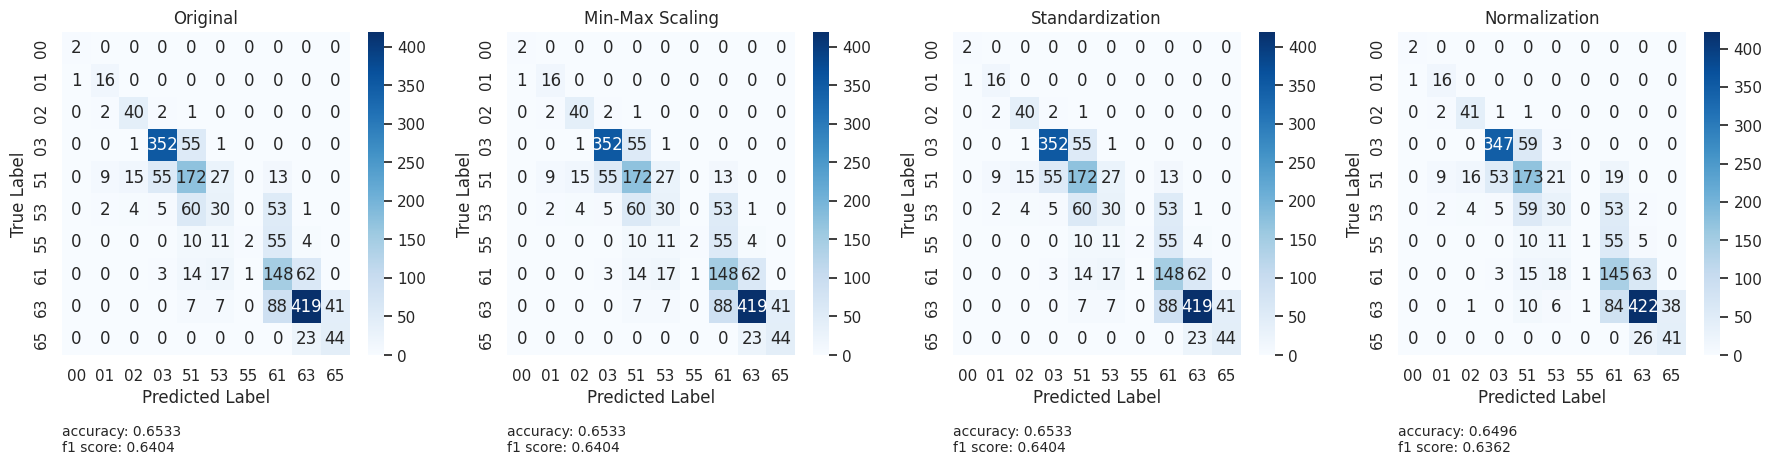

In [65]:
lda_score = []
lda = []

for i in range(data_varian_size):
    lda.append(My_LDA(X_train_varian_group[i], X_test_varian_group[i], y_train, y_test))
    lda_score.append(lda[i].forward())

final_score.append(lda_score)
display_confusion_matrix(lda, varian_group_name, y_label)

/workspaces/weather_analysis/.venv/lib/python3.12/site-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 0 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
/workspaces/weather_analysis/.venv/lib/python3.12/site-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 1 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
/workspaces/weather_analysis/.venv/lib/python3.12/site-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 2 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
/workspaces/weather_analysis/.venv/lib/python3.12/site-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 3 is not full rank. Increasing the value 

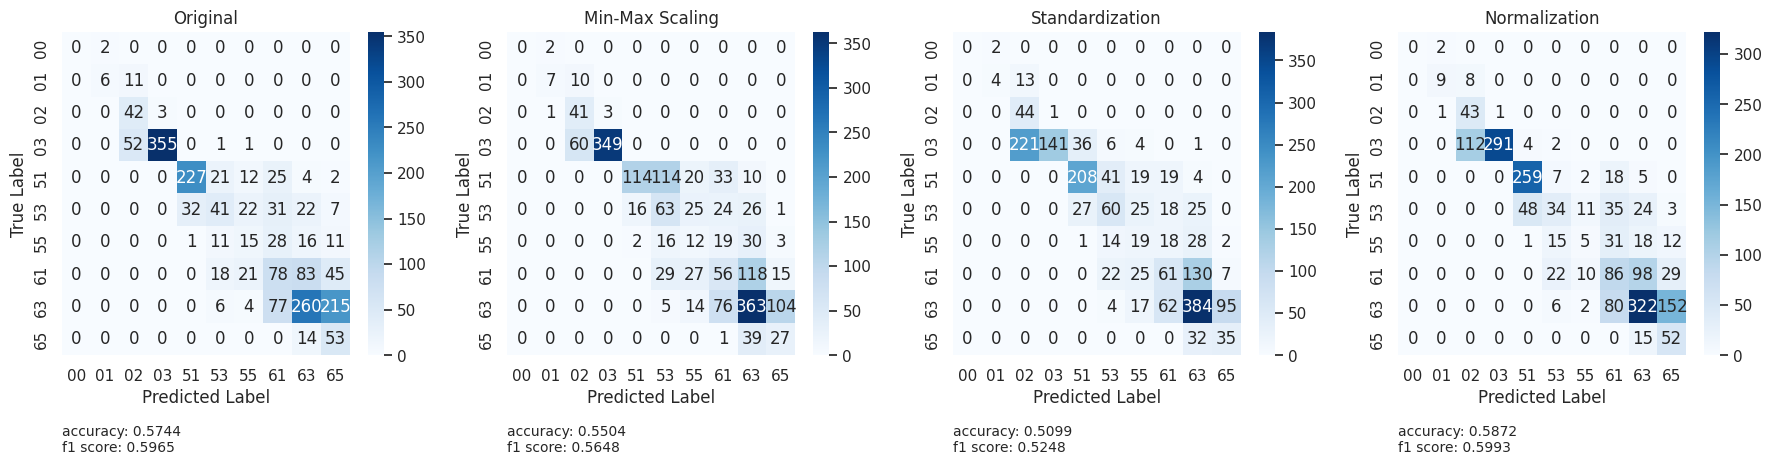

In [66]:
qda_score = []
qda = []

for i in range(data_varian_size):
    qda.append(My_QDA(X_train_varian_group[i], X_test_varian_group[i], y_train, y_test))
    qda_score.append(qda[i].forward())

final_score.append(qda_score)
display_confusion_matrix(qda, varian_group_name, y_label)

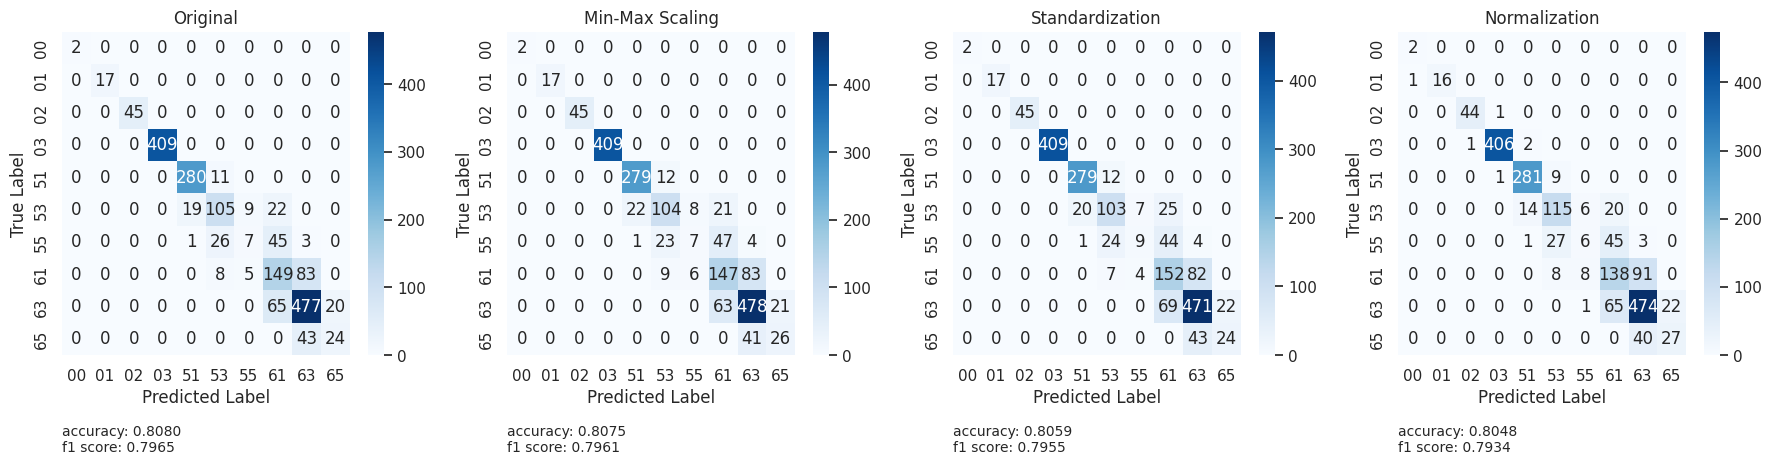

In [67]:
xgb_score = []
xgb = []

for i in range(data_varian_size):
    xgb.append(My_XGB(X_train_varian_group[i], X_test_varian_group[i], y_train, y_test))
    xgb_score.append(xgb[i].forward())

final_score.append(xgb_score)
display_confusion_matrix(xgb, varian_group_name, y_label, "XGBoost")

Nhận xét:
- Confusion Matrix lý tưởng là 1 ma trận đường chéo
- 1 số thuật toán phụ thuộc rất lớn vào scaling chẳng hạn Kernel SVM
- 1 số thuật toán không cần scaling vẫn cho ra kết quả tương đối tốt chẳng hạn random forest, XGBoost

In [68]:
np_score = np.array(final_score)
print(np_score.shape)

(7, 4, 2)


In [69]:
bar_width = 0.1
index = np.arange(len(np_score))

bar1_positions = index - bar_width * 2
bar2_positions = index - bar_width * 1
bar3_positions = index + bar_width * 0
bar4_positions = index + bar_width * 1

categories = ["Gaussian Naive Bayes", "K-Nearest Neighbors", "Random Forest", "Kernel SVM", "LDA", "QDA", "XGBoost"]

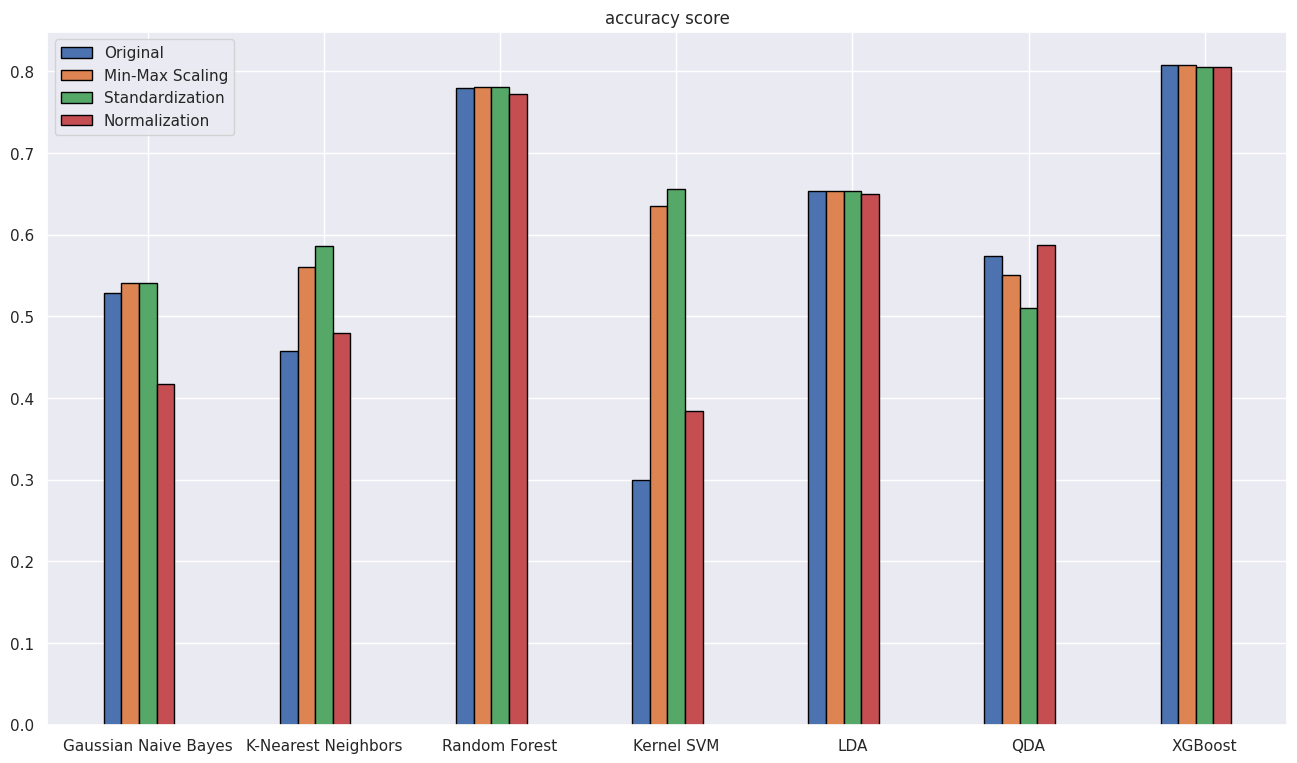

In [71]:
fig, ax = plt.subplots(figsize=(16, 9))

ax.bar(bar1_positions, np_score[:,0,0], label="Original", width=bar_width, edgecolor='black')
ax.bar(bar2_positions, np_score[:,1,0], label="Min-Max Scaling", width=bar_width, edgecolor='black')
ax.bar(bar3_positions, np_score[:,2,0], label="Standardization", width=bar_width, edgecolor='black')
ax.bar(bar4_positions, np_score[:,3,0], label="Normalization", width=bar_width, edgecolor='black')

ax.set_xticks(index)              # Set x-tick locations to the center of the grouped bars
ax.set_xticklabels(categories)    # Set x-tick labels

plt.title("accuracy score")
plt.legend()
plt.savefig('accuracy.png') # Saves as a PNG file
plt.show()


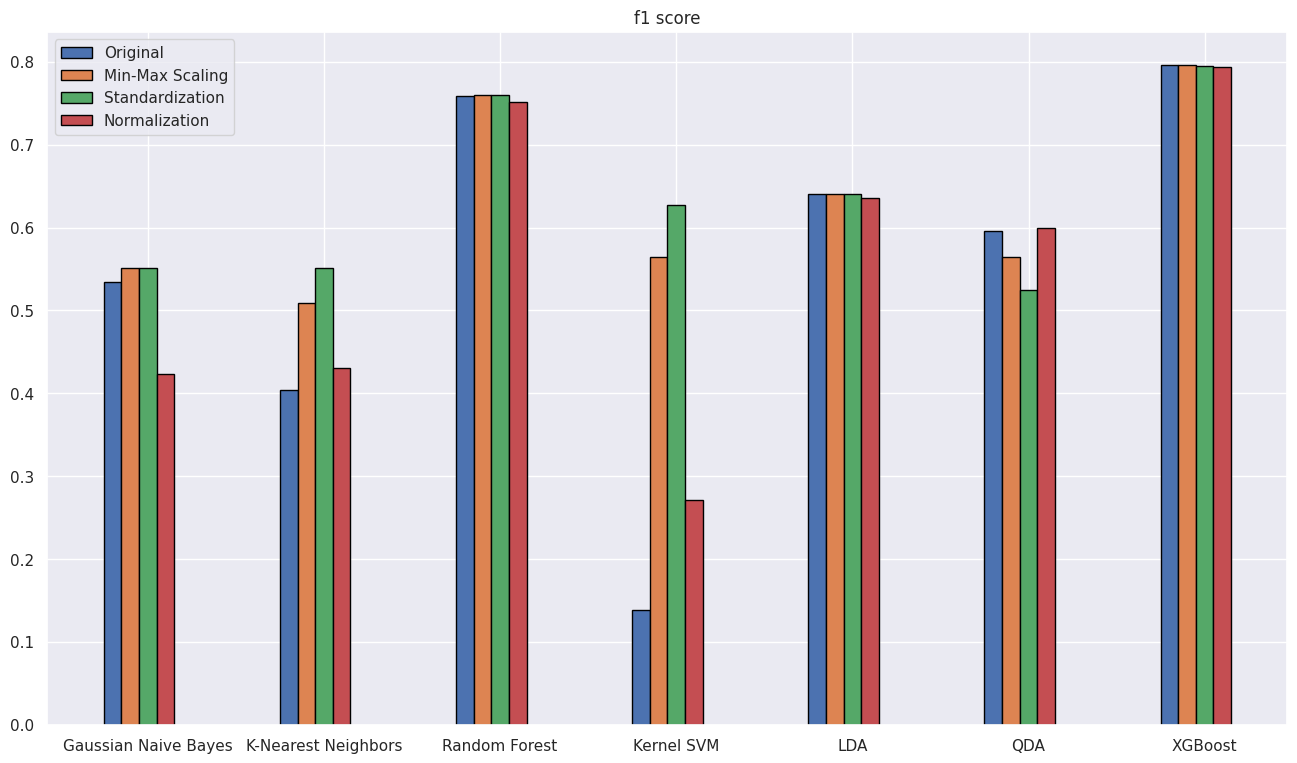

In [72]:
fig, ax = plt.subplots(figsize=(16, 9))

ax.bar(bar1_positions, np_score[:,0,1], label="Original", width=bar_width, edgecolor='black')
ax.bar(bar2_positions, np_score[:,1,1], label="Min-Max Scaling", width=bar_width, edgecolor='black')
ax.bar(bar3_positions, np_score[:,2,1], label="Standardization", width=bar_width, edgecolor='black')
ax.bar(bar4_positions, np_score[:,3,1], label="Normalization", width=bar_width, edgecolor='black')

ax.set_xticks(index) # Set x-tick locations to the center of the grouped bars
ax.set_xticklabels(categories) # Set x-tick labels

plt.title("f1 score")
plt.legend()
plt.show()

Nhận xét:
- XGBoost cho kết quả tốt nhất, tiếp đến là Random Forest
- 2 thuật toán này đều không phụ thuộc vào Scaling

TODO:
- Try more varian of XGBoost to improve